# Imports

In [39]:
import numpy as np
import scipy
from scipy import linalg
import matplotlib.pyplot as plt

# Utility Functions

## Metrics

In [2]:
def get_mse(y_real, y_pred):
    return np.mean((y_real - y_pred) ** 2)

def get_rmse(y_real, y_pred):
    return np.sqrt(get_mse(y_real, y_pred))

## Standardization

In [3]:
class StandardScaler:
    def __init__(self):
        self.fitted = False

    def fit_transform(self, data):      
        self.mean = data.mean(axis=0)
        self.std = data.std(axis=0)
        self.fitted = True

        scaled_data = (data - self.mean) / self.std
        return scaled_data
    
    def transform(self, data):
        if not self.fitted:
            raise Exception('Scaler not fitted!')

        scaled_data = (data - self.mean) / self.std
        return scaled_data

    def inverse_transform(self, scaled_data):
        if not self.fitted:
            raise Exception('Scaler not fitted!')
        
        original_data = (scaled_data * self.std) + self.mean
        return original_data


## Min-max feature scaling

In [4]:
class MinMaxScaler:
    def __init__(self):
        self.fitted = False

    def fit_transform(self, data):      
        self.maximum = data.max(axis=0)
        self.minimum = data.min(axis=0)
        self.fitted = True

        scaled_data =  (data - self.minimum) / (self.maximum - self.minimum)
        return scaled_data
    
    def transform(self, data):
        if not self.fitted:
            raise Exception('Scaler not fitted!')

        scaled_data =  (data - self.minimum) / (self.maximum - self.minimum)
        return scaled_data

    def inverse_transform(self, scaled_data):
        if not self.fitted:
            raise Exception('Scaler not fitted!')
        
        original_data = (self.maximum - self.minimum) * scaled_data + self.minimum
        return original_data

# Question 1

In [5]:
data = np.genfromtxt('./artificial1d.csv', delimiter=',')
data[:5,:]

array([[-1.        , -2.08201726],
       [-0.93103448, -1.32698023],
       [-0.86206897, -1.10559772],
       [-0.79310345, -0.87394576],
       [-0.72413793, -0.28502695]])

## Item a) 
Show the model parameters and the MSE (Mean Squared Error) obtained by OLS (Ordinary Least Squares) method. Plot the result line over the data.

In [111]:
def linear_regression_ols(X, y):
    anti_non_inv_matrix = (10 ** -8) * np.eye(X.shape[1], X.shape[1])
    w_hat = (np.linalg.inv(X.T @ X + anti_non_inv_matrix) @ X.T) @ y
    return w_hat.reshape(-1, 1)

In [7]:
X = np.hstack([np.ones((len(data), 1)), data[:,[0]]])
y = data[:,[1]]

In [8]:
w = linear_regression_ols(X, y)

print('Coeficients of Linear Regression Using Ordinary Least Squares Method:')
for i in range(len(w)):
    if i == 0:
        print('Intercept:\t{:.6f}'.format(w[i, 0]))
    else:
        print('X({}):    \t{:.6f}'.format(i, w[i, 0]))

y_pred = (X @ w).reshape(-1, 1)

print('\n#--- Metrics ---#')
print('MSE:', get_mse(y, y_pred))
print('RMSE:', get_rmse(y, y_pred))


Coeficients of Linear Regression Using Ordinary Least Squares Method:
Intercept:	0.067618
X(1):    	1.574865

#--- Metrics ---#
MSE: 0.2134009013293699
RMSE: 0.461953354062258


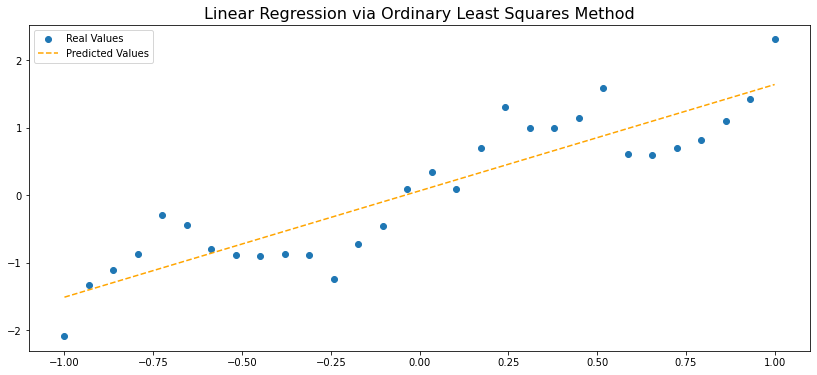

In [9]:
fig = plt.figure(figsize=(14, 6))
plt.title('Linear Regression via Ordinary Least Squares Method', fontsize=16)
plt.scatter(X[:, 1], y, label = 'Real Values')
plt.plot(X[:, 1], y_pred, c='orange', linestyle='--', label = 'Predicted Values')
plt.legend()
plt.show()

## OLS with QR Decomposition

When m $\gg$ n, we can use QR Decomposition to mitigate numerical problems of matrix inversion in standard formula of OLS (Normal Equation). $\\$
Doing the substituion $\boldsymbol{X} = \boldsymbol{QR}$, where $\boldsymbol{Q}^{\top}\boldsymbol{Q} = \boldsymbol{I}$ and $\boldsymbol{R}$ is a upper triangular matrix, we have the result as follows:$\newline$
$$\begin{aligned}
\hat{\boldsymbol{w}} = (\boldsymbol{X}^{\top}\boldsymbol{X})^{-1} \boldsymbol{X}^{\top}\boldsymbol{y} \\
\hat{\boldsymbol{w}} = (\boldsymbol{(QR)}^{\top}\boldsymbol{(QR)})^{-1} \boldsymbol{(QR)}^{\top}\boldsymbol{y} \\
\hat{\boldsymbol{w}} = (\boldsymbol{R}^{\top}\boldsymbol{Q}^{\top}\boldsymbol{QR})^{-1} \boldsymbol{R}^{\top}\boldsymbol{Q}^{\top}\boldsymbol{y} \\
\hat{\boldsymbol{w}} = (\boldsymbol{R}^{\top}\boldsymbol{R})^{-1} \boldsymbol{R}^{\top}\boldsymbol{Q}^{\top}\boldsymbol{y} \\
\hat{\boldsymbol{w}} = \boldsymbol{R}^{-1}(\boldsymbol{R}^{\top^{-1}}\boldsymbol{R}^{\top})\boldsymbol{Q}^{\top}\boldsymbol{y} \\
\hat{\boldsymbol{w}} = \boldsymbol{R}^{-1}\boldsymbol{Q}^{\top}\boldsymbol{y}  \text{  or  }  \boldsymbol{R}\hat{\boldsymbol{w}} = \boldsymbol{Q}^{\top}\boldsymbol{y}\\
\end{aligned}$$

In [139]:
def linear_regression_ols_qr_decomposition(X, y):
    """
        Equation -> Rw = transpose(Q)y
    """
    Q, R = np.linalg.qr(X) 
    right_side_of_equation = Q.T @ y
    w = scipy.linalg.solve_triangular(R, right_side_of_equation)
    return w

In [140]:
X = np.hstack([np.ones((len(data), 1)), data[:,[0]]])
y = data[:,[1]]

In [141]:
w = linear_regression_ols_qr_decomposition(X, y)

print('Coeficients of Linear Regression Using Ordinary Least Squares Method with QR Decomposition:')
for i in range(len(w)):
    if i == 0:
        print('Intercept:\t{:.6f}'.format(w[i, 0]))
    else:
        print('X({}):    \t{:.6f}'.format(i, w[i, 0]))

y_pred = (X @ w).reshape(-1, 1)

print('\n#--- Metrics ---#')
print('MSE:', get_mse(y, y_pred))
print('RMSE:', get_rmse(y, y_pred))


Coeficients of Linear Regression Using Ordinary Least Squares Method with QR Decomposition:
Intercept:	0.067618
X(1):    	1.574865

#--- Metrics ---#
MSE: 0.21340090132936987
RMSE: 0.46195335406225796


## Item b) 
Show the model parameters, the MSE and the learning curve obtained by Gradient Descent method. Plot the result line over the data.

In [142]:
def linear_regression_gd(X, y, alfa=0.1, n_iterations=1000):

    np.random.seed(123142)
    w = np.random.uniform(0, 1, X.shape[1]).reshape(-1, 1)
    count = 0
    learning_curve = []
    while count < n_iterations:

        y_hat = X @ w
        e = (y - y_hat) 

        # print((w + (1/len(y))))
        w = w + ((1/len(y)) * alfa * (e.T @ X)).reshape(-1, 1)

        y_pred = (X @ w)
        learning_curve.append(get_mse(y, y_pred))

        count+=1

    # print(w * X_std + X_mean)
    return np.array([w]).reshape(-1, 1), learning_curve

In [143]:
X = np.hstack([np.ones((data.shape[0], 1)), data[:, [0]]])
y = data[:, [1]]

In [144]:
w, learning_curve_gd = linear_regression_gd(X, y, alfa=0.1, n_iterations=200)

print('Coeficients of Linear Regression Using Gradient Descent Method:')
for i in range(len(w)):
    if i == 0:
        print('Intercept:\t{:.6f}'.format(w[i, 0]))
    else:
        print('X({}):    \t{:.6f}'.format(i, w[i, 0]))

y_pred = (X @ w).reshape(-1, 1)

print('\n#--- Metrics ---#')
print('MSE:', get_mse(y, y_pred))
print('RMSE:', get_rmse(y, y_pred))

Coeficients of Linear Regression Using Gradient Descent Method:
Intercept:	0.067618
X(1):    	1.574075

#--- Metrics ---#
MSE: 0.21340112369149283
RMSE: 0.4619535947381434


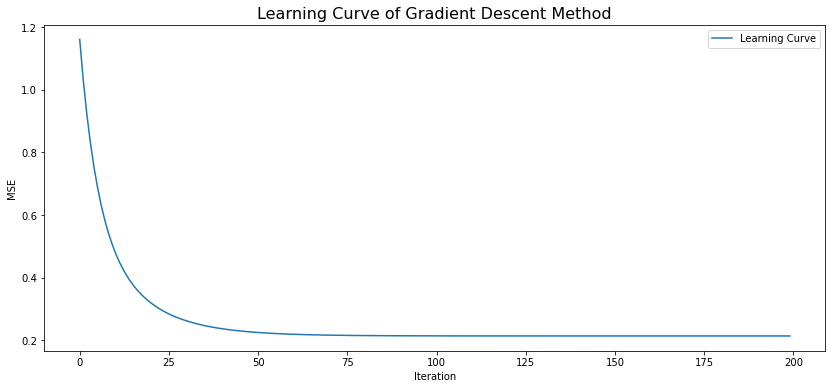

In [145]:
fig = plt.figure(figsize=(14, 6))
plt.title('Learning Curve of Gradient Descent Method', fontsize=16)
# plt.scatter(X[:, 1], y, label = 'Real Values')
plt.plot(learning_curve_gd, label='Learning Curve')
plt.xlabel('Iteration')
plt.ylabel('MSE')
# plt.plot(X[:, 1], y_pred, c='orange', linestyle='--', label = 'Predicted Values')
plt.legend()
plt.show()

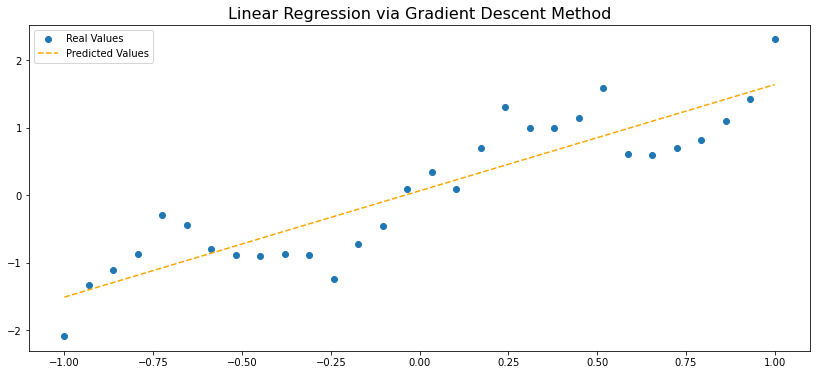

In [146]:
fig = plt.figure(figsize=(14, 6))
plt.title('Linear Regression via Gradient Descent Method', fontsize=16)
plt.scatter(X[:, 1], y, label = 'Real Values')
plt.plot(X[:, 1], y_pred, c='orange', linestyle='--', label = 'Predicted Values')
plt.legend()
plt.show()

## Item c) 
Show the model parameters, the MSE and the learning curve obtained by Stochastic Gradient Descent method. Plot the result line over the data.

In [147]:
def linear_regression_sgd(X, y, alfa=0.1, n_iterations=1000):

    np.random.seed(123142)
    w = np.random.uniform(0, 1, X.shape[1]).reshape(-1, 1)
    random_indexes = np.random.randint(0, X.shape[0], n_iterations)

    count = 0
    learning_curve = []
    while count < n_iterations:
        
        random_X = X[[random_indexes[count]]]
        random_y = y[[random_indexes[count]]]

        y_hat = random_X @ w
        e = (random_y - y_hat)
        w = w + (alfa * (e.T * random_X)).reshape(-1, 1)

        y_pred = (X @ w)
        learning_curve.append(get_mse(y, y_pred))

        count+=1

    return np.array(w), learning_curve

In [148]:
X = np.hstack([np.ones((data.shape[0], 1)), data[:, [0]]])
y = data[:, [1]]

In [149]:
w, learning_curve_sgd = linear_regression_sgd(X, y, alfa=0.1, n_iterations=200)

print('Coeficients of Linear Regression Using Stochastic Gradient Descent Method:')
for i in range(len(w)):
    if i == 0:
        print('Intercept:\t{:.6f}'.format(w[i, 0]))
    else:
        print('X({}):    \t{:.6f}'.format(i, w[i, 0]))

y_pred = (X @ w).reshape(-1, 1)

print('\n#--- Metrics ---#')
print('MSE:', get_mse(y, y_pred))
print('RMSE:', get_rmse(y, y_pred))

Coeficients of Linear Regression Using Stochastic Gradient Descent Method:
Intercept:	0.039748
X(1):    	1.622922

#--- Metrics ---#
MSE: 0.2150005713210871
RMSE: 0.46368154084574803


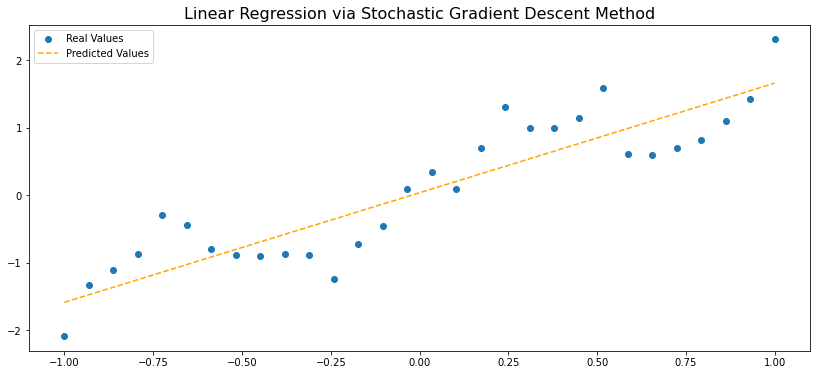

In [150]:
fig = plt.figure(figsize=(14, 6))
plt.title('Linear Regression via Stochastic Gradient Descent Method', fontsize=16)
plt.scatter(X[:, 1], y, label = 'Real Values')
plt.plot(X[:, 1], y_pred, c='orange', linestyle='--', label = 'Predicted Values')
plt.legend()
plt.show()

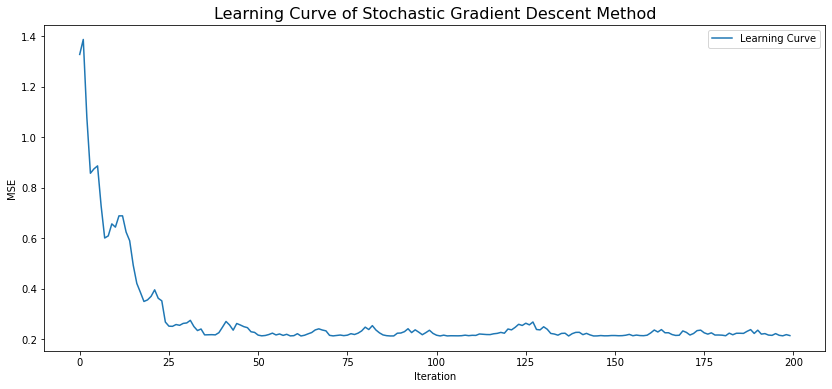

In [151]:
fig = plt.figure(figsize=(14, 6))
plt.title('Learning Curve of Stochastic Gradient Descent Method', fontsize=16)
plt.plot(learning_curve_sgd, label='Learning Curve')
plt.xlabel('Iteration')
plt.ylabel('MSE')
plt.legend()
plt.show()

## Learning Curves Compare

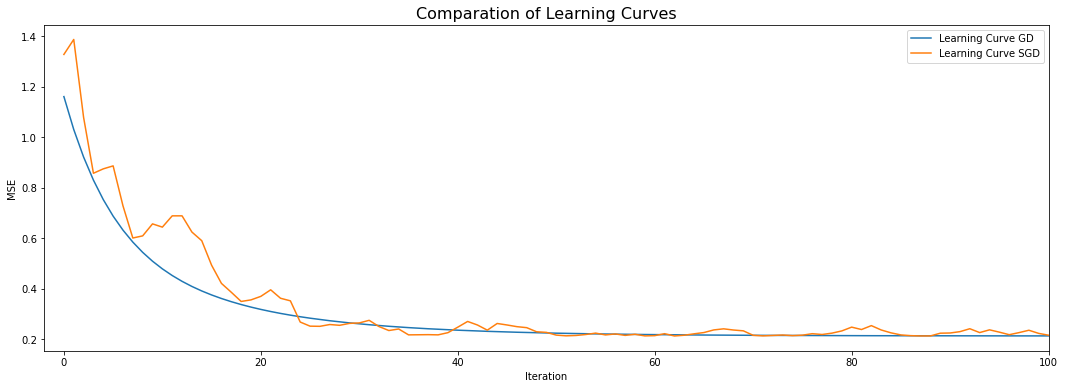

In [152]:
fig = plt.figure(figsize=(18, 6))
plt.title('Comparation of Learning Curves', fontsize=16)
plt.plot(learning_curve_gd, label='Learning Curve GD')
plt.plot(learning_curve_sgd, label='Learning Curve SGD')
plt.xlabel('Iteration')
plt.ylabel('MSE')
plt.xlim(-2, 100)
plt.legend()
plt.show()

# Question 2

Consider the dataset available in california.csv, organized into 9 columns, the 8 first being the independent variables (features) and the last column the dependent variable (target).
The dependent variables are used to predict the median of house prices in California districts in the 1990s.

- a) Randomly split the dataset in training (80%) and test (20%) 
- b) Train 11 polynomial regression models, with degrees from 1 to 11. You can you OLS algorithm to do this task.
- c) Report the RMSE of train and test for each model. Plot one chart to train and one chart to test.
- d) Repeat the previous 2 itens including the regularization term L2 (eg with factor λ = 0.001)

In [153]:
california_data = np.genfromtxt('./california.csv', delimiter=',')
california_data[:5,:]

array([[ 4.16850000e+00,  2.00000000e+01,  6.70063694e+00,
         1.17834395e+00,  7.45000000e+02,  2.37261146e+00,
         3.88000000e+01, -1.21150000e+02,  2.17500000e+00],
       [ 2.81940000e+00,  2.40000000e+01,  4.76250000e+00,
         1.02083333e+00,  6.08000000e+02,  2.53333333e+00,
         3.67500000e+01, -1.19850000e+02,  8.11000000e-01],
       [ 2.42500000e+00,  4.60000000e+01,  4.92771084e+00,
         1.01807229e+00,  7.72000000e+02,  2.32530120e+00,
         3.63300000e+01, -1.19310000e+02,  8.49000000e-01],
       [ 3.12050000e+00,  1.60000000e+01,  3.72847682e+00,
         1.10154525e+00,  1.26000000e+03,  2.78145695e+00,
         3.38700000e+01, -1.17990000e+02,  1.74000000e+00],
       [ 4.38890000e+00,  4.10000000e+01,  5.74100719e+00,
         1.19904077e+00,  8.37000000e+02,  2.00719424e+00,
         3.41500000e+01, -1.18400000e+02,  3.80400000e+00]])

In [154]:
def train_test_split(data, train_size_perc, random_seed=264852):
    N = data.shape[0]
    train_size = int(train_size_perc * N)

    indexes = np.arange(0, N, 1)

    np.random.seed(random_seed)
    train_idx = np.random.choice(indexes, train_size, replace=False)
    test_idx = np.delete(indexes, train_idx)

    train_data = data[train_idx]
    test_data = data[test_idx]

    X_train = train_data[:,:-1]
    y_train = train_data[:,[-1]]

    X_test = test_data[:,:-1]
    y_test = test_data[:,[-1]]

    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = train_test_split(california_data, 0.8)

print('X_train shape:', X_train.shape)
print('y_train shape:', y_train.shape)
print('X_test shape:', X_test.shape)
print('y_test shape:', y_test.shape)

X_train shape: (4000, 8)
y_train shape: (4000, 1)
X_test shape: (1000, 8)
y_test shape: (1000, 1)


In [155]:
def insert_polynomial_features(X, polynomial_degree):

    # X_poly = np.hstack([np.ones((X.shape[0], 1)), X])
    X_poly = X
    if polynomial_degree > 1:
        for i in range(2, polynomial_degree+1):
            X_poly = np.hstack([X_poly, X**i])
        
    return X_poly

def insert_intercept_column(X):
    return np.hstack([np.ones((X.shape[0], 1)), X])

In [159]:
rmse_train_list = []
rmse_test_list = []

for i in range(11):
    print(f'\n\n#--- Polynomial Regression - Degree {i+1} ---#')
    
    X_train_poly = insert_polynomial_features(X_train, i+1)

    # Scaling train data
    X_scaler = StandardScaler()
    X_train_norm_poly = X_scaler.fit_transform(X_train_poly)
    y_scaler = StandardScaler()
    y_train_norm = y_scaler.fit_transform(y_train)
    
    # Inserting column of intercept with 1's
    X_train_norm_poly = insert_intercept_column(X_train_norm_poly)

    w = linear_regression_ols(X_train_norm_poly, y_train_norm)

    # Predicting y_train
    y_train_norm_pred = X_train_norm_poly @ w
    y_train_pred = y_scaler.inverse_transform(y_train_norm_pred)
    
    # Reporting training metrics
    rmse_train = get_rmse(y_train, y_train_pred)
    rmse_train_list.append([i+1, rmse_train])
    print('MSE Train:', rmse_train)

    X_test_poly = insert_polynomial_features(X_test, i+1)

    # Scaling test data
    X_test_norm_poly = X_scaler.transform(X_test_poly)

    # Inserting column of intercept with 1's
    X_test_norm_poly = insert_intercept_column(X_test_norm_poly)

    # Predicting y_test
    y_test_norm_pred = X_test_norm_poly @ w
    y_test_pred = y_scaler.inverse_transform(y_test_norm_pred)

    # Reporting test metrics
    rmse_test = get_rmse(y_test, y_test_pred)
    rmse_test_list.append([i+1, rmse_test])
    print('RMSE Test:', rmse_test)

rmse_train_list = np.array(rmse_train_list)
rmse_test_list = np.array(rmse_test_list)



#--- Polynomial Regression - Degree 1 ---#
MSE Train: 0.7232215674105248
RMSE Test: 0.720783360553266


#--- Polynomial Regression - Degree 2 ---#
MSE Train: 0.6694238556475012
RMSE Test: 0.6691671190546016


#--- Polynomial Regression - Degree 3 ---#
MSE Train: 0.6377755594889747
RMSE Test: 0.7833262684297281


#--- Polynomial Regression - Degree 4 ---#
MSE Train: 0.6304964775872884
RMSE Test: 1.4963236581966095


#--- Polynomial Regression - Degree 5 ---#
MSE Train: 0.6281682502404418
RMSE Test: 1.1167087314687738


#--- Polynomial Regression - Degree 6 ---#
MSE Train: 0.6262075922481455
RMSE Test: 1.5142814353912266


#--- Polynomial Regression - Degree 7 ---#
MSE Train: 0.6212894233597501
RMSE Test: 113.90120398060921


#--- Polynomial Regression - Degree 8 ---#
MSE Train: 0.6202070386989736
RMSE Test: 732.4113611117249


#--- Polynomial Regression - Degree 9 ---#
MSE Train: 0.6201948172814177
RMSE Test: 839.5456288164257


#--- Polynomial Regression - Degree 10 ---#
MSE Train: 0

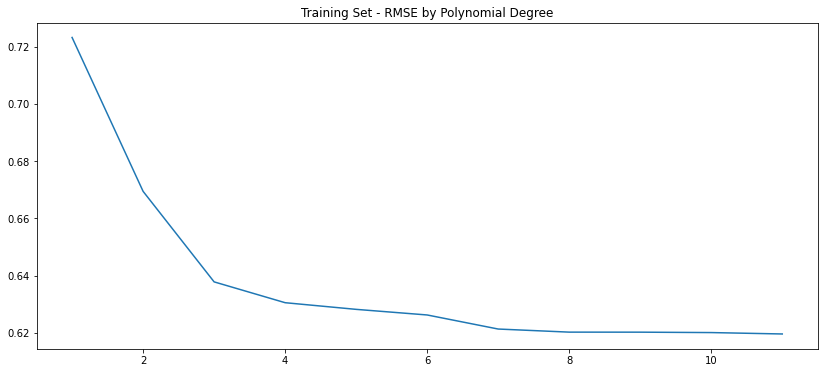

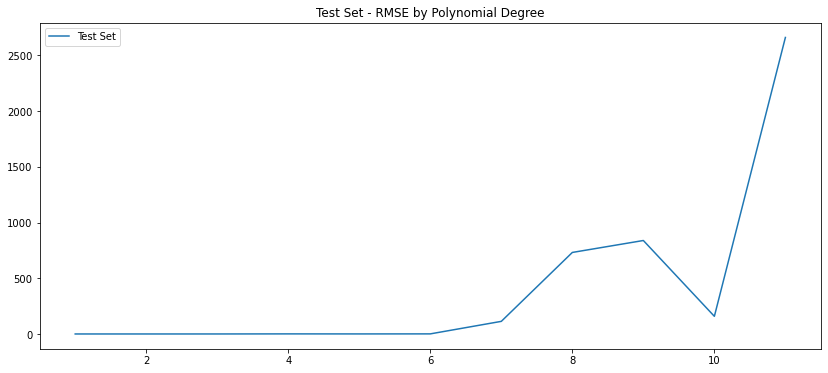

In [160]:
plt.figure(figsize=(14,6))
plt.title('Training Set - RMSE by Polynomial Degree')
plt.plot(rmse_train_list[:, 0], rmse_train_list[:, 1], label='Training Set')
# plt.ylim(0, 20)
plt.figure(figsize=(14,6))
plt.title('Test Set - RMSE by Polynomial Degree')
plt.plot(rmse_test_list[:, 0], rmse_test_list[:, 1], label='Test Set')
plt.legend()
plt.show()

## With L2 Regularization

In [158]:
def linear_regression_ols_reg(X, y, reg_lambda=0.001):
    reg_matrix = np.eye(X.shape[1], X.shape[1]) * reg_lambda
    reg_matrix[0, 0] = 0

    w_hat = (np.linalg.pinv(X.T @ X + reg_matrix) @ X.T) @ y
    return w_hat.reshape(-1, 1)

In [162]:
rmse_train_list = []
rmse_test_list = []

for i in range(11):
    print(f'\n\n#--- Polynomial Regression with Regularization - Degree {i+1} ---#')
    
    X_train_poly = insert_polynomial_features(X_train, i+1)

    # Scaling train data
    X_scaler = StandardScaler()
    X_train_norm_poly = X_scaler.fit_transform(X_train_poly)
    y_scaler = StandardScaler()
    y_train_norm = y_scaler.fit_transform(y_train)
    
    # Inserting column of intercept with 1's
    X_train_norm_poly = insert_intercept_column(X_train_norm_poly)

    w = linear_regression_ols_reg(X_train_norm_poly, y_train_norm)

    # Predicting y_train
    y_train_norm_pred = X_train_norm_poly @ w
    y_train_pred = y_scaler.inverse_transform(y_train_norm_pred)
    
    # Reporting training metrics
    rmse_train = get_rmse(y_train, y_train_pred)
    rmse_train_list.append([i+1, rmse_train])
    print('MSE Train:', rmse_train)

    X_test_poly = insert_polynomial_features(X_test, i+1)

    # Scaling test data
    X_test_norm_poly = X_scaler.transform(X_test_poly)

    # Inserting column of intercept with 1's
    X_test_norm_poly = insert_intercept_column(X_test_norm_poly)

    # Predicting y_test
    y_test_norm_pred = X_test_norm_poly @ w
    y_test_pred = y_scaler.inverse_transform(y_test_norm_pred)

    # Reporting test metrics
    rmse_test = get_rmse(y_test, y_test_pred)
    rmse_test_list.append([i+1, rmse_test])
    print('RMSE Test:', rmse_test)

rmse_train_list = np.array(rmse_train_list)
rmse_test_list = np.array(rmse_test_list)



#--- Polynomial Regression with Regularization - Degree 1 ---#
MSE Train: 0.7232215674115687
RMSE Test: 0.720783327421249


#--- Polynomial Regression with Regularization - Degree 2 ---#
MSE Train: 0.6694242395460761
RMSE Test: 0.669180538248675


#--- Polynomial Regression with Regularization - Degree 3 ---#
MSE Train: 0.6506935015601831
RMSE Test: 0.7689509715495159


#--- Polynomial Regression with Regularization - Degree 4 ---#
MSE Train: 0.6467495976740893
RMSE Test: 1.4183206658227723


#--- Polynomial Regression with Regularization - Degree 5 ---#
MSE Train: 0.6449567109113369
RMSE Test: 0.8377954969708235


#--- Polynomial Regression with Regularization - Degree 6 ---#
MSE Train: 0.6444166360704735
RMSE Test: 1.1249360994247732


#--- Polynomial Regression with Regularization - Degree 7 ---#
MSE Train: 0.6440411378038093
RMSE Test: 8.969089071503587


#--- Polynomial Regression with Regularization - Degree 8 ---#
MSE Train: 0.6431876255940995
RMSE Test: 31.159633343835807


#

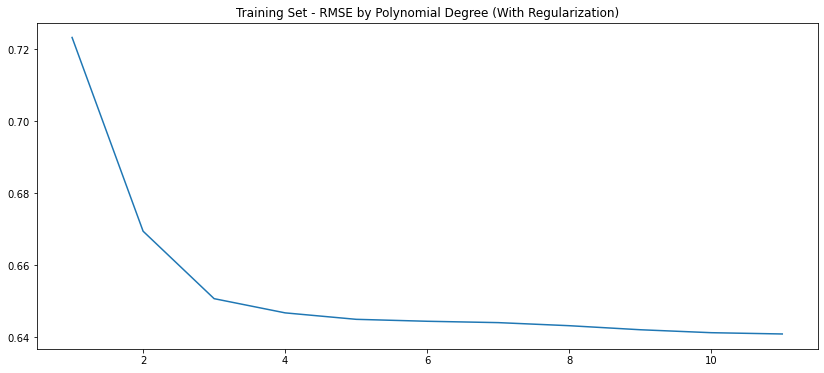

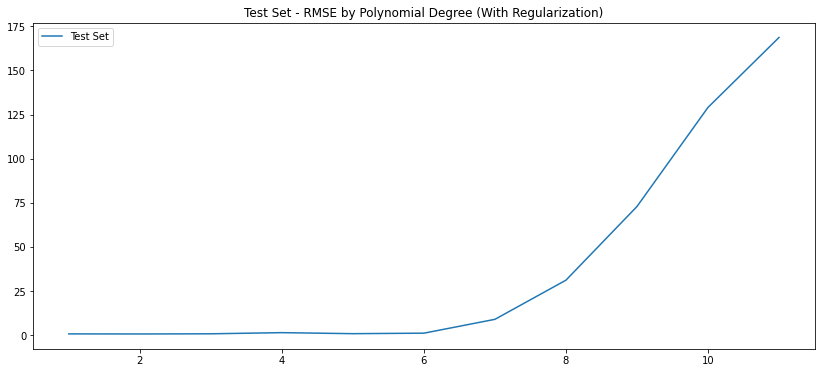

In [164]:
plt.figure(figsize=(14,6))
plt.title('Training Set - RMSE by Polynomial Degree (With Regularization)')
plt.plot(rmse_train_list[:, 0], rmse_train_list[:, 1], label='Training Set')
# plt.ylim(0, 20)
plt.figure(figsize=(14,6))
plt.title('Test Set - RMSE by Polynomial Degree (With Regularization)')
plt.plot(rmse_test_list[:, 0], rmse_test_list[:, 1], label='Test Set')
plt.legend()
plt.show()
# plt.ylim(0, 20)